## morpho_n_inputs_analysis
Analysis of the n inputs experiments of the morphologically detailed CA1 pyramidal cell model from n_inputs_morpho.py

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import elephant.statistics as estats
import elephant
import neo
from elephant.spike_train_dissimilarity import victor_purpura_distance
from elephant.spike_train_dissimilarity import van_rossum_distance
from quantities import ms, s, Hz

In [2]:
# load data
data_dir = '/home/ec753/Projects/neuron_input_space/morpho_nInputs_out/'

In [3]:
import os
os.listdir(data_dir)

['exp3_20_rep_spikes.csv',
 'exp14_8_rep_spikes.csv',
 'exp14_3_rep_spikes.csv',
 'exp12_22_rep_spikes.csv',
 'exp11_25_rep_spikes.csv',
 'exp11_stimuli.json',
 'exp12_15_rep_spikes.csv',
 'exp13_8_rep_spikes.csv',
 'exp12_39_rep_spikes.csv',
 'exp12_40_rep_spikes.csv',
 'exp11_21_rep_spikes.csv',
 'exp2_33_rep_spikes.csv',
 'exp12_10_rep_spikes.csv',
 'exp1_21_rep_spikes.csv',
 'exp11_38_rep_spikes.csv',
 'exp3_17_rep_spikes.csv',
 'exp10_11_rep_spikes.csv',
 'exp13_37_rep_spikes.csv',
 'exp1_27_rep_spikes.csv',
 'exp0_stimuli.json',
 'exp14_obv_spikes.csv',
 'exp13_10_rep_spikes.csv',
 'exp2_8_rep_spikes.csv',
 'exp14_9_rep_spikes.csv',
 'exp12_24_rep_spikes.csv',
 'exp10_27_rep_spikes.csv',
 'exp3_18_rep_spikes.csv',
 'exp13_9_rep_spikes.csv',
 'exp3_5_rep_spikes.csv',
 'exp12_26_rep_spikes.csv',
 'exp10_34_rep_spikes.csv',
 'exp12_35_rep_spikes.csv',
 'exp0_25_rep_spikes.csv',
 'exp11_10_rep_spikes.csv',
 'exp10_30_rep_spikes.csv',
 'exp1_18_rep_spikes.csv',
 'exp11_31_rep_spikes.c

In [4]:
exps = ['exp0','exp1','exp2','exp3']
ns = [x for x in range(2,40,1)]
max_time = 1000

gTruth_spikes = {}
nInputs_spikes = {}

for exp in exps:
    
    # load observed spikes
    with open(f'{data_dir}{exp}_obv_spikes.csv','r') as fin:
        gTruth_spikes[exp] = [float(spike) for spike in fin.readlines()]

    # load replicated spikes
    nInputs_spikes[exp] = {}
    for n in ns:
        with open(f'{data_dir}{exp}_{n}_rep_spikes.csv', 'r') as fin:
            nInputs_spikes[exp][n] = [float(spike) for spike in fin.readlines() if float(spike) < max_time]

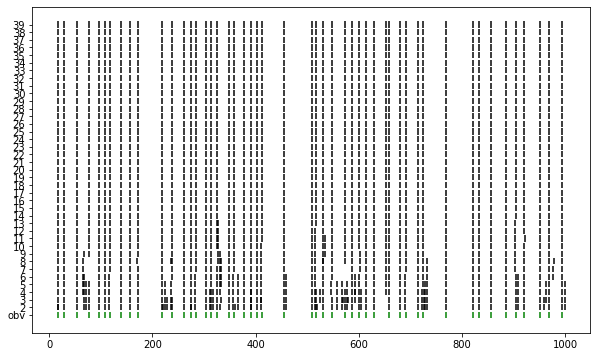

In [5]:
obv_spikes = gTruth_spikes['exp0']
rep_spikes = nInputs_spikes['exp0']

plt.figure(figsize=(10,6))
plt.vlines(obv_spikes, -.9, -.1, 'green')

for i, n in enumerate(ns):
    plt.vlines(rep_spikes[n], i+.1, i+.9, 'black')
    
plt.yticks(np.arange(-.5, len(ns), 1), ['obv']+[x for x in ns])
plt.show()

## spike train distances

In [6]:
q = 1.0 / (10.0 * ms) # cost factor for shifting spikes in the victor purpura distance
tau = 10.0 * ms # time constant for the van rossum distance

In [7]:
gTruth_trains = {}
nInputs_trains = {}

for exp in exps:
    gTruth_trains[exp] = neo.SpikeTrain(gTruth_spikes[exp] * ms, t_stop=max_time*ms)
    
    nInputs_trains[exp] = {}
    for n in ns:
        nInputs_trains[exp][n] = neo.SpikeTrain(nInputs_spikes[exp][n] * ms, t_stop=max_time*ms)

In [8]:
vp_dists = {}
vr_dists = {}
for exp in exps:
    vp_dists[exp] = {}
    vr_dists[exp] = {}
    for n in ns:
        vp_dists[exp][n] = victor_purpura_distance(
            [gTruth_trains[exp], nInputs_trains[exp][n]], q)[0, 1]
        vr_dists[exp][n] = van_rossum_distance(
            [gTruth_trains[exp], nInputs_trains[exp][n]], tau)[0, 1]

In [9]:
firing_rates = {exp:len(gTruth_spikes[exp]) for exp in exps}
firing_rates

{'exp0': 49, 'exp1': 18, 'exp2': 59, 'exp3': 31}

In [10]:
np.array(list(vp_dists[exp].values()))

array([9.74319393, 7.75269838, 7.67088277, 6.63110002, 4.43277516,
       3.39466683, 2.39963385, 1.39413409, 1.34984557, 0.21642749,
       0.17275211, 0.0880668 , 0.07532555, 0.08047058, 0.05740903,
       0.05663844, 0.04157852, 0.04495016, 0.03469898, 0.03529425,
       0.03432946, 0.03341427, 0.0270166 , 0.0251836 , 0.02472747,
       0.02378308, 0.02549813, 0.02060348, 0.0249861 , 0.0250722 ,
       0.02095089, 0.02313338, 0.02439585, 0.02438998, 0.02163752,
       0.02196374, 0.02883201, 0.02238818])

In [11]:
import matplotlib.pylab as pl

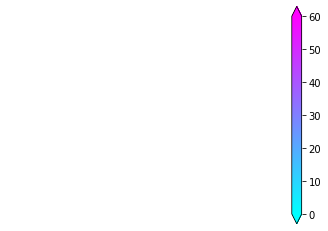

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

fraction = 1  # .05

norm = mpl.colors.Normalize(vmin=0, vmax=60)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='cool'),
            ax=ax, extend='both')

ax.axis('off')
plt.show()

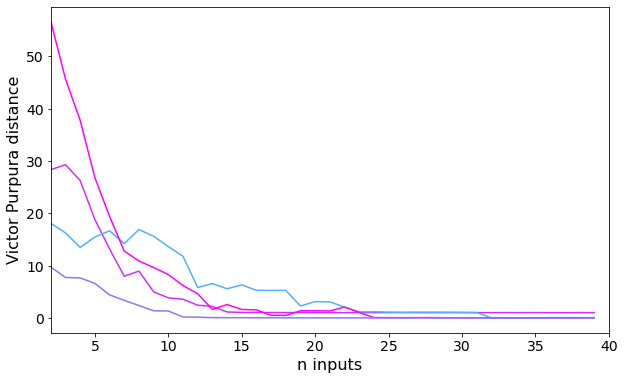

In [15]:
plt.figure(figsize=(10,6))

colors = pl.cm.cool(np.linspace(0,1,60))

for exp in exps:
    plt.plot(vp_dists[exp].keys(), list(vp_dists[exp].values()), color=colors[firing_rates[exp]])
    

    
#plt.legend([f'{firing_rate} Hz CA1 model' for firing_rate in firing_rates.values()])
plt.ylabel('Victor Purpura distance', fontsize=16)
plt.xlabel('n inputs', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(2, 40)
plt.show()

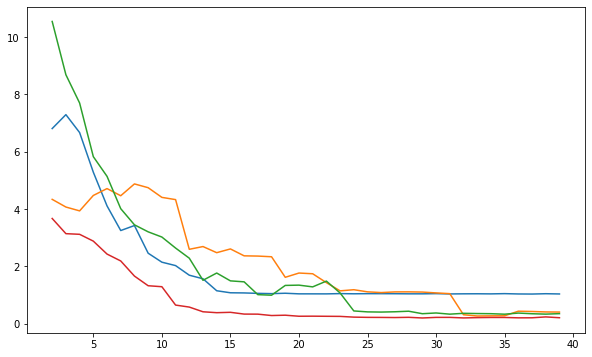

In [14]:
plt.figure(figsize=(10,6))
for exp in exps:
    plt.plot(vr_dists[exp].keys(), list(vr_dists[exp].values()))